In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
#%load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py


---------------------------------
Working on the host: Joachims-MacBook-Pro.local

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Feb  1 2022, 19:30:18) [Clang 11.1.0 ]

---------------------------------
Python interpreter: /opt/miniconda3/envs/srh/bin/python


# Inferenzstatistik und Konfidenzintervalle

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm, t

Die <a href="https://de.wikipedia.org/wiki/Statistische_Inferenz">Inferenzstatistik</a> besteht aus Methoden, die Stichprobenergebnisse verwenden, um Entscheidungen oder Vorhersagen über eine Grundgesamtheit zu treffen ({cite:p}`fahrmeirstatistik` s.12, {cite:p}`Bourier2013` s.237). Dieser Bereich der angewandten Statistik ist in allen Situationen von grundlegender Bedeutung, in denen das Wissen über die Grundgesamtheit begrenzt ist oder sogar gänzlich fehlt, was bei den meisten Anwendungen im wirklichen Leben der Fall ist. Außerdem ist es in vielen Fällen einfach zu teuer, sehr zeitaufwändig oder praktisch unmöglich, die Daten aller Mitglieder einer Grundgesamtheit zu erfassen. Daher wird eine Stichprobe aus der Grundgesamtheit gezogen und eine geeignete Stichprobenstatistik berechnet. Auf der Grundlage des Wertes der Stichprobenstatistik wird dann dem entsprechenden (unbekannten) Grundgesamtheitsparameter ein Wert zugewiesen.

Dieses Verfahren, bei dem Grundgesamtheitsparameter auf der Grundlage von Stichproben ein numerischer Wert zugewiesen wird, wird als <a href="https://de.wikipedia.org/wiki/Sch%C3%A4tzung">Schätzung</a> bezeichnet.Der numerische Wert wird als **Schätzung** des Grundgesamtheitsparameters bezeichnet. Die zur Schätzung eines Populationsparameters verwendete Stichprobenstatistik wird als **Schätzer** bezeichnet ({cite:p}`fahrmeirstatistik` s.339).

## Die Punkteschätzung

Bei einer Stichprobe ergibt der Wert der berechneten Stichprobenstatistik eine **Punktschätzung** ({cite:p}`fahrmeirstatistik` s.338) des entsprechenden Populationsparameters. Beispielsweise ist der Stichprobenmittelwert ($\bar{x}$) eine Punktschätzung des entsprechenden Populationsmittelwerts $\mu$, oder die Stichprobenstandardabweichung $s$ ist eine Punktschätzung für die Standardabweichung der Grundgesamtheit $\sigma$. Es ist jedoch zu beachten, dass jede zufällig ausgewählte Stichprobe aus einer Population voraussichtlich einen anderen Wert der Stichprobenstatistik ergibt. Mit anderen Worten, der Stichprobenmittelwert $\bar{x}$ und die Stichprobenstandardabweichung $s$ variieren von Stichprobe zu Stichprobe, während der Grundgesamtheitsmittelwert $\mu$ und die Grundgesamtheitsstandardabweichung $\sigma$ fest sind. Folglich weicht der Punktschätzer fast immer vom wahren Wert der Grundgesamtheit ab. Daher sollte jeder Punktschätzung eine Information beigefügt werden, die die Genauigkeit dieser Schätzung angibt.

## Die Intervall-Schätzung

Anstatt einem Grundgesamtheitsparameter einen einzelnen Wert zuzuordnen, gibt eine **Intervallschätzung** eine probabilistische Aussage, die das gegebene Intervall mit der Wahrscheinlichkeit in Beziehung setzt, dass dieses Intervall tatsächlich den wahren (unbekannten) Grundgesamtheitsparameter enthält.

Das **Konfidenzniveau** wird a priori gewählt und hängt somit von den Präferenzen des Nutzers ab. Es wird bezeichnet durch

$$ 100(1-\alpha)\% $$

Obwohl jeder beliebige Wert für das Konfidenzniveau gewählt werden kann, sind die gebräuchlichsten Werte $90 \%, 95 \%$ und $99 \%$. Wird das Konfidenzniveau als Wahrscheinlichkeit ausgedrückt, wird es als **Konfidenzkoeffizient** bezeichnet und mit $(1-\alpha)$. Die gebräuchlichsten Vertrauenskoeffizienten sind $0,90$, $0,95$ bzw. $0,99$.

Ein $100(1-α) \%$-iges <a href="https://de.wikipedia.org/wiki/Konfidenzintervall">Konfidenzintervall</a> ist eine Intervallschätzung um einen Populationsparameter $\theta$ (hier ist der griechische Buchstabe $\theta$ ein Platzhalter für einen beliebigen Populationsparameter von Interesse, wie z. B. den Mittelwert $\mu$ oder die Standardabweichung $\sigma$), von dem bei wiederholten Stichproben der Größe $N$ erwartet wird, dass er den wahren Wert von $\theta$ in $100(1-α) \%$ der Fälle einschließt ({cite:p}`fahrmeirstatistik` s.358).

Die tatsächliche Zahl, die zur Punktschätzung addiert oder von ihr subtrahiert wird, wird als Fehlermarge bezeichnet.

$$CI: \text{Punktschätzung} \pm \text{Fehlermarge}$$

Die Fehlermarge besteht aus zwei Elementen. Zum einen aus dem so genannten **kritischen Wert** und zum anderen aus einem Maß für die Variabilität der <a href="https://de.wikipedia.org/wiki/Sch%C3%A4tzfunktion#Stichprobenverteilung">Stichprobenverteilung</a>. Der kritische Wert ist ein numerischer Wert, der dem a priori festgelegten Vertrauensniveau entspricht. Er wird manchmal als $z^*$ oder $z^*_{\alpha/2}$ bezeichnet. Das Maß für die Variabilität ist der <a href="https://de.wikipedia.org/wiki/Standardfehler">Standardfehler</a>, der als $\frac{\sigma}{\sqrt{n}}$ bezeichnet wird.

Die Fehlermarge ($FM$) wird also ausgedrückt als

$$FM = z^*_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}$$

Schauen wir uns zum besseren Verständnis eine Abbildung an.

[]

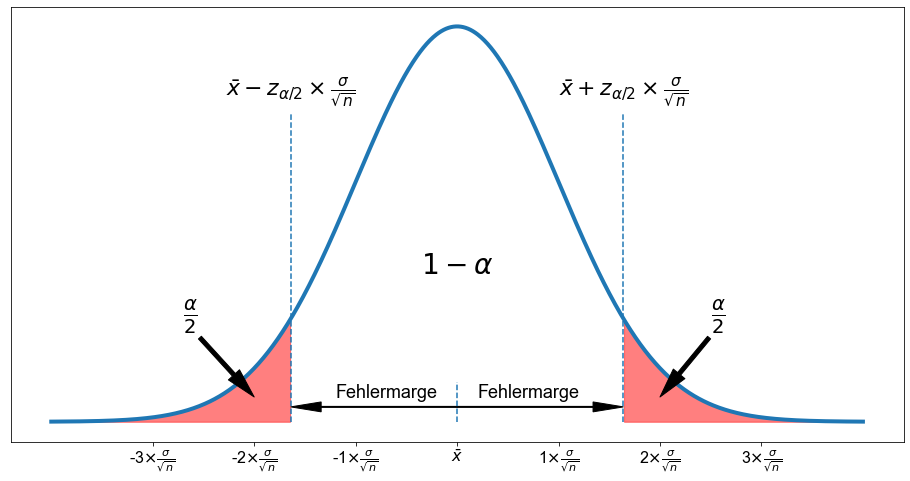

In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 8))
x = np.linspace(-4, 4, 1000)

mu = 0
sigma = 1
ax.plot(x, norm.pdf(x), color="C0", linewidth=4)


z = [-1.64, 0, 1.64]
for _x in z:
    if _x != 0:
        ax.vlines(_x, ymin=-0, ymax=norm.pdf(_x, mu, sigma) * 3, linestyle="dashed")
    else:
        ax.vlines(_x, ymin=-0, ymax=norm.pdf(_x, mu, sigma) * 0.1, linestyle="dashed")

ticks = [-3, -2, -1, 0, 1, 2, 3]
ax.set_xticks(ticks)

ax.set_xticklabels(
    [
        f"{x}" + r"$\times \frac{\sigma}{\sqrt{n}}$" if x != 0 else r"$\bar{x}$"
        for x in ticks
    ]
)
ax.fill_between(x, norm.pdf(x), where=x <= z[0], color="r", alpha=0.5)
ax.fill_between(x, norm.pdf(x), where=x >= z[2], color="r", alpha=0.5)

# ax.set_ylabel(r"$f(x)$")
# ax.set_xlabel(r"z-score")
# ax.annotate(
#     r"$\phi(z)$",
#     xy=(-0.5, 0.15),
#     xytext=(-2, 0.3),
#     # textcoords="data",
#     arrowprops=dict(headwidth=15, headlength=30, width=4, color="k"),
#     size=28,
# )
ax.text(s=r"$1- \alpha$", x=0, y=0.15, size=28, horizontalalignment="center")

ax.text(
    s=r"$\bar{x} - z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}$",
    x=-1.64,
    y=0.33,
    size=22,
    horizontalalignment="center",
)

ax.text(
    s=r"$\bar{x} + z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}$",
    x=1.64,
    y=0.33,
    size=22,
    horizontalalignment="center",
)

ax.annotate(
    r"$\frac{\alpha}{2}$",
    xy=(2, 0.025),
    xytext=(2.5, 0.1),
    # textcoords="data",
    arrowprops=dict(headwidth=15, headlength=30, width=4, color="k"),
    size=28,
)
ax.annotate(
    r"$\frac{\alpha}{2}$",
    xy=(-2, 0.025),
    xytext=(-2.7, 0.1),
    # textcoords="data",
    arrowprops=dict(headwidth=15, headlength=30, width=4, color="k"),
    size=28,
)

ax.arrow(0, 0.015, -1.34, 0, head_width=0.01, head_length=0.3, color="k")
ax.arrow(0, 0.015, 1.34, 0, head_width=0.01, head_length=0.3, color="k")

ax.text(s="Fehlermarge", x=0.7, y=0.025, size=18, horizontalalignment="center")
ax.text(s="Fehlermarge", x=-0.7, y=0.025, size=18, horizontalalignment="center")
ax.set_yticks([])

Dementsprechend lautet die vollständige Gleichung für das Konfidenzintervall wie folgt

$$CI: \text{Punktschätzung} \pm z^*_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}$$

Um den entsprechenden Wert für $z^*_{\alpha/2}$ zu erhalten, kann man ihn in einer <a href="https://de.wikipedia.org/wiki/Standardnormalverteilungstabelle">Tabelle</a> nachschlagen oder die Funktion `norm.ppf()` in Python verwenden. Lassen Sie uns zur Übung einige Konfidenzintervalle konstruieren.

**Konfidenzniveau von** $90 \% (\alpha=0,1)$

In [4]:
norm.ppf(0.05)

-1.6448536269514729

In [5]:
norm.ppf(0.95)

1.6448536269514722

Die untere und obere Grenze des Intervalls, das einen Bereich von $90 \%$ um den Mittelwert abdeckt, wird durch die $z$-Werte $-1,64$ bzw. $1,64$ angegeben.

Bei einem Konfidenzniveau von $90 \% (\alpha=0,1)$ ergibt sich aus der obigen Gleichung

$$CI_{90\%}: \text{Punktschätzung} \pm 1,64 \times \frac{\sigma}{\sqrt{n}}$$

**Konfidenzniveau von** $95 \% (\alpha=0,05)$

In [6]:
norm.ppf(0.025)

-1.9599639845400545

In [7]:
norm.ppf(0.975)

1.959963984540054

Die untere und obere Grenze des Intervalls, das einen Bereich von $90 \%$ um den Mittelwert abdeckt, wird durch die $z$-Werte $-1,96$ bzw. $1,96$ angegeben.

Bei einem Konfidenzniveau von $95 \% (\alpha=0,05)$ ergibt sich aus der obigen Gleichung

$$CI_{95\%}: \text{Punktschätzung} \pm 1,96 \times \frac{\sigma}{\sqrt{n}}$$

**Konfidenzniveau von** $99 \% (\alpha=0,01)$

In [8]:
norm.ppf(0.005)

-2.575829303548901

In [9]:
norm.ppf(0.995)

2.5758293035489004

Die untere und obere Grenze des Intervalls, das einen Bereich von $90 \%$ um den Mittelwert abdeckt, wird durch die $z$-Werte $-2,58$ bzw. $2,58$ angegeben.

Bei einem Konfidenzniveau von $99 \% (\alpha=0,01)$ ergibt sich aus der obigen Gleichung

$$CI_{99\%}: \text{Punktschätzung} \pm 2,58 \times \frac{\sigma}{\sqrt{n}}$$

## Die Breite eines Konfidenzintervalls und der Kompromiss zwischen Präzision und Genauigkeit

### Ein Gedankenexperiment

Betrachten wir die durchschnittliche Tagestemperatur in Berlin an einem schönen Sommertag im Juni. Nehmen wir an, wir messen eine mittlere Tagestemperatur von $19^\circ\text{C}$. Nun geht es darum, die mittlere Temperatur von morgen zu schätzen.

Es gibt natürlich mehrere mehr oder weniger ausgeklügelte Ansätze, um diese Aufgabe zu lösen. Man kann in den Datenarchiven nachsehen und die Schätzung auf deskriptive Statistiken stützen, oder man kann sogar einen sehr ausgeklügelten Modellierungsansatz mit einer Unmenge von Modellparametern anwenden, oder man kann einfach eine Schätzung auf der Grundlage des gesunden Menschenverstands vornehmen. Unabhängig davon, welcher Ansatz gewählt wird, wird das Ergebnis immer eine Schätzung sein, die mit einem gewissen Grad an Unsicherheit verbunden ist.

Um dieser Unsicherheit Rechnung zu tragen, präsentieren wir keine Punktschätzung der morgigen Temperatur, sondern eine Intervallschätzung. Um eine hohe **Genauigkeit** unserer Schätzung zu erreichen, also, dass wir sehr sicher sein wollen, dass unser Intervall den tatsächlichen Wert enthält, wenden wir eine sehr große Fehlermarge an. Wir sagen zum Beispiel, dass die morgige Temperatur $19 \pm 20^\circ\text{C}$ beträgt. Nach gesundem Menschenverstand würden wir wahrscheinlich zustimmen, dass die durchschnittliche Tagestemperatur an einem Sommertag im Juni in Berlin zwischen $-1$ und $39^\circ\text{C}$ liegt.

Obwohl das Intervall sehr groß ist und vielleicht sogar alle mittleren Tagestemperaturen im Juni für Berlin in der Geschichte der Wetterbeobachtung enthält, besteht immer noch eine kleine Chance, dass wir uns irren. Stellen Sie sich ein natürliches oder vom Menschen verursachtes katastrophales Ereignis wie einen gewaltigen Vulkanausbruch, einen Asteroideneinschlag oder einen Atomkrieg vor; in diesen glücklicherweise sehr unwahrscheinlichen Fällen kann selbst eine so große Fehlermarge nicht garantieren, dass die morgige Durchschnittstemperatur innerhalb des angegebenen Intervalls liegt. Dennoch ist es wichtig zu beachten, dass wir, **um eine hohe Genauigkeit zu erreichen, das Konfidenzniveau und damit die Breite des Konfidenzintervalls erhöhen**.

OK, wir sagen, dass die morgige Temperatur im Bereich von $19 \pm 20^\circ\text{C}$ liegt. Aber ist eine solche Aussage, obwohl sie sehr genau ist, überhaupt von Wert? Hilft uns diese Schätzung bei der Entscheidung, welche Kleidung wir morgen tragen sollen? Nein, ganz und gar nicht!

In vielen Anwendungen sind wir also nicht nur an der **Genauigkeit** interessiert, sondern auch an der **Präzision** einer Schätzung. Eine Schätzung der morgigen Temperatur mit höherer Genauigkeit wäre $19 \pm 2^\circ\text{C}$. Eine solche Vorhersage hilft uns zwar bei der Entscheidung, welche Kleidung wir anziehen sollen, aber die Wahrscheinlichkeit, dass wir uns irren, ist viel größer. Daher ist es wichtig, sich zu vergegenwärtigen, dass eine **Erhöhung der Genauigkeit die Breite des Konfidenzintervalls verkleinert und somit das Konfidenzniveau verringert**. Diese Abwägung zwischen Genauigkeit und Präzision bei der Auswahl eines geeigneten Konfidenzniveaus ist in der Praxis sehr wichtig.

## Schätzung des Mittelwerts einer Grundgesamtheit - Die $z$-Verteilung

Die Schätzung des Mittelwerts einer Grundgesamtheit anhand einer Stichprobe ist eine sehr häufige Aufgabe. Wenn die Standardabweichung der Grundgesamtheit ($\sigma$) bekannt ist, basiert die Konstruktion eines Konfidenzintervalls für den Grundgesamtheitsmittelwert ($\mu$) auf der normalverteilten Stichprobenverteilung der Stichprobenmittelwerte (gewährleistet durch den <a href="https://de.wikipedia.org/wiki/Zentraler_Grenzwertsatz">zentralen Grenzwertsatz</a>). Wenn die Grundgesamtheit, aus der die Stichprobe gezogen wird, nicht normalverteilt ist, sollte der Stichprobenumfang $n \gt 30$ sein.

Das $100(1-α) \%$ige Konfidenzintervall für $\mu$ ist gegeben durch

$$CI: \bar x \pm z^*_{\alpha/2}\times \sigma_{\bar x}$$

$$\text{wobei}\qquad \sigma_{\bar x} = \frac{\sigma}{\sqrt{n}}$$

Der Wert von $z^*_{\alpha/2}$ entspricht dem kritischen Wert und wird aus der <a href="https://de.wikipedia.org/wiki/Standardnormalverteilungstabelle">Standardnormaltabelle</a> entnommen oder mit der Funktion `norm.ppf()` in Python berechnet. Der kritische Wert ist eine Größe, die mit dem gewünschten Konfidenzniveau zusammenhängt. Typische Werte für $z^*_{\alpha/2}$ sind $1,64$, $1,96$ und $2,58$, was einem Konfidenzniveau von $90 \%, 95 \%$ und $99 \%$ entspricht. Dieser kritische Wert wird mit dem Standardfehler ($\sigma_{\bar{x}}$)multipliziert, um die Fehlermarge zu vergrößern oder zu verkleinern.

Der Standardfehler ($\sigma_{\bar{x}}$) ergibt sich aus dem Verhältnis zwischen der Standardabweichung der Grundgesamtheit ($\sigma$) und der Quadratwurzel des Stichprobenumfangs $n$. Er beschreibt das Ausmaß, in dem die berechnete Stichprobenstatistik von einer Stichprobe zur anderen abweichen kann. Das Produkt aus dem kritischen Wert und dem Standardfehler wird als Fehlermarge bezeichnet. Es ist die Größe, die vom Wert von $\bar{x}$ subtrahiert und zu diesem addiert wird, um das Konfidenzintervall für $\mu$ zu erhalten.

## Intervallschätzung für einen Mittelwert - Die $z$-Verteilung

Zum besseren Verständnis der Schätzung eines Populationsmittelwerts und der Konstruktion eines Konfidenzintervalls diskutieren wir das Verfahren anhand eines Datensatzes. Dazu laden wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Zunächst importieren wir den Datensatz und geben ihm einen passenden Namen.

In [10]:
# Lese Datei students.csv als Dataframe ein
students = pd.read_csv("../../data/students.csv")

Der `students` Datensatz besteht aus 8239 Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und 16 Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud_id, name, gender, age, height, weight, religion, nc_score, semester, major, minor, score1, score2, online_tutorial, graduated, salary*.

In diesem Abschnitt konzentrieren wir uns auf die Größe von Studentinnen. Wir gehen davon aus, dass die im Datensatz angegebenen Größenmessungen eine sehr gute Annäherung an die interessierende Population darstellen, nämlich die Größe der Studentinnen in cm. Die Variable `height` der Studentinnen ist annähernd normalverteilt - was durch die symmetrische Glockenform des Populationshistogramms bestätigt wird.

In [11]:
female = students.loc[students["gender"] == "Female", "height"]

Text(0.5, 0, 'Größe in cm')

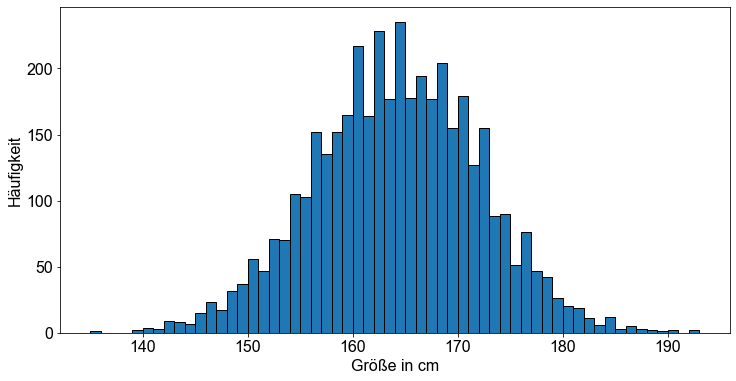

In [12]:
# Bestimme Anzahl Bins
bins = max(female) - min(female)

# Plotte die Werte als Histogramm
fig, ax = plt.subplots()

ax.hist(female, bins, edgecolor="k")

# Erzeuge Labels
ax.set_ylabel("Häufigkeit")
ax.set_xlabel("Größe in cm")

Auf der Grundlage der gegebenen Daten berechnen wir zunächst den Populationsmittelwert $\mu$ und die Populationsstandardabweichung $\sigma$.

In [13]:
f_mean = np.mean(female)
f_mean

163.65328467153284

In [14]:
f_std = np.std(female)
f_std

7.918762263149209

Anschließend konstruieren wir eine Wahrscheinlichkeitsverteilung, indem wir die Funktion `norm.pdf()` anwenden, die durch die zuvor berechneten Parameter $\mu$ und $\sigma$ definiert ist, und stellen sie über dem Histogramm dar.

Text(0.5, 0, 'Größe in cm')

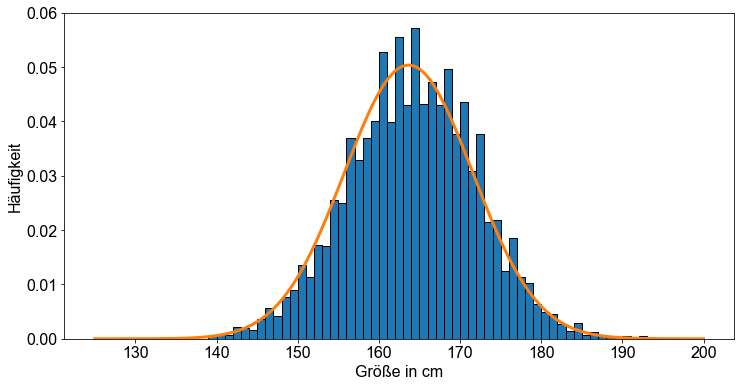

In [15]:
x = np.linspace(125, 200, 500)
y = norm.pdf(x, f_mean, f_std)

# Bestimme Anzahl Bins
bins = max(female) - min(female)

# Plotte die Werte als Histogramm
fig, ax = plt.subplots()
ax.hist(female, bins=bins, edgecolor="k", density=True)
ax.plot(x, y, linewidth=3)
# Erzeuge Labels
ax.set_ylabel("Häufigkeit")
ax.set_xlabel("Größe in cm")

Eine gute Übereinstimmung!

Nun nehmen wir eine Zufallsstichprobe mit einem Stichprobenumfang von $n=10$
aus der Wahrscheinlichkeitsverteilung, indem wir die Funktion `norm.rvs()` anwenden und den Stichprobenmittelwert $\bar{x}$ berechnen.

In [16]:
# Grösse der Stichprobe
sample_size = 10

# Wähle normalverteilte Zufallszahlen mit Mittelwert f_mean und Standardabweichung f_std aus
sample = norm.rvs(f_mean, f_std, sample_size, random_state=1)
sample

array([176.51608944, 158.80893107, 159.47081813, 155.15670124,
       170.50624195, 145.42794689, 177.47003423, 157.62546819,
       166.17967943, 161.67857995])

In [17]:
sample_mean = np.mean(sample)
sample_mean

162.88404905120882

Unsere Stichprobe ergibt einen Stichprobenmittelwert $\bar{x}$ von etwa $162,884$. Dies ist unser Punktschätzer für den interessierenden Grundgesamtheitsparameter, der in diesem Fall die durchschnittliche Körpergröße der Studentinnen ($\mu$).

Wie genau ist unsere Punktschätzung? Wir fragen Python, ob unsere Schätzung mit dem wahren Grundgesamtheitsparameter übereinstimmt.

In [18]:
sample_mean == f_mean

False

OK, das haben wir erwartet!

Berechnen wir nun einige Intervallschätzungen, indem wir die $90\%-, 95\%-$ und $99\%-$ Konfidenzintervalle konstruieren. Erinnern Sie sich an die Gleichung für ein Konfidenzintervall.

$$CI: \text{Punktschätzung} \pm z^*_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}$$

Der kritische Wert $z^*_{\alpha/2}$ beträgt $1,64$, $1,96$ und $2,58$ für Konfidenzniveaus von $90\%, 95\%$ bzw. $99\%$.

Angewandt auf unsere Daten ergibt die Gleichung

$$CI_{90\%}: 162,884 \pm 1,64 \times \frac{7,92}{\sqrt{10}} = 162,884 \pm 4,12$$

Wir können also mit $90\%$iger Sicherheit sagen, dass die durchschnittliche Körpergröße der Studenten (der Grundgesamtheitsparameter $\mu$) zwischen $158,764$ und $167,004$ cm liegt.

$$CI_{95\%}: 162,884 \pm 1,96 \times \frac{7,92}{\sqrt{10}} = 162,884 \pm 4,91$$

Wir können also mit 95%iger Sicherheit sagen, dass die durchschnittliche Körpergröße der Studenten zwischen $157,974$ und $167,794$ cm liegt.

$$CI_{99\%}: 162,884 \pm 2,58 \times \frac{7,92}{\sqrt{10}} = 162,884 \pm 6,45$$

Wir können also mit $99\%$iger Sicherheit sagen, dass die durchschnittliche Körpergröße der Studenten zwischen $156,434$ und $169,334$ cm liegt.

Es liegt auf der Hand, **dass die Fehlerspanne größer wird, wenn man eine höhere Sicherheit haben will, dass der unbekannte Grundgesamtheitsparameter im Intervall enthalten ist**.

Zur Überprüfung der Richtigkeit wollen wir untersuchen, ob wir mit unseren Intervallschätzungen tatsächlich den wahren Wert der Grundgesamtheit erfasst haben. Es ist wichtig, sich daran zu erinnern, dass das Konfidenzintervall unserem Stichprobenmittelwert keine Wahrscheinlichkeit zuweist, sondern besagt, dass das Konfidenzintervall bei wiederholten Zufallsstichproben den Mittelwert der Grundgesamtheit in $100(1-\alpha)\%$ der Fälle enthalten soll. Um diese Behauptung zu testen, schreiben wir selbst eine einfache Python-Funktion.

In [19]:
def CI_eval(pop_mean, sigma, n, estimate, alpha):
    """Funktion zur Evaluierung des Konfidenzintervalls"""
    out = {f"{int((1 - x) * 100)}%": {} for x in alpha}

    for e, _alpha in enumerate(alpha):
        key = f"{int((1 - _alpha) * 100)}%"
        out[key]["true value"] = pop_mean
        out[key]["estimate"] = estimate
        upper = estimate + norm.ppf(1 - _alpha / 2) * sigma / np.sqrt(n)
        out[key]["upper"] = upper
        lower = estimate - norm.ppf(1 - _alpha / 2) * sigma / np.sqrt(n)
        out[key]["lower"] = lower
        out[key]["test"] = pop_mean >= lower and pop_mean <= upper

    return out

Wenden wir nun unsere selbst erstellte Funktion `CI_eval()` auf unsere Daten an. Wir setzen `pop_mean = f_mean`, `sigma = f_std`, `n = sample_size`, `estimate = sample_mean`, `alpha = [0.1, 0.05, 0.01]`, um zu evaluieren, ob die drei oben konstruierten Konfidenzintervalle ($90\%, 95\%$ und $99\%$) den Grundgesamtheitsmittelwert enthalten. Schließlich wandeln wir den resultierenden Vektor in ein `dataframe` -Objekt um, um die Lesbarkeit zu verbessern.

In [20]:
df = pd.DataFrame.from_dict(
    CI_eval(
        pop_mean=f_mean,
        sigma=f_std,
        n=sample_size,
        estimate=sample_mean,
        alpha=[0.1, 0.05, 0.01],
    )
)
df

,90%,95%,99%
true value,163.653285,163.653285,163.653285
estimate,162.884049,162.884049,162.884049
upper,167.00298,167.792059,169.334267
lower,158.765118,157.97604,156.433831
test,True,True,True


Ein interessantes Ergebnis. Der wahre Mittelwert der Grundgesamtheit (`f_mean` = $163,65$) wird von allen drei Konfidenzintervallen erfasst. Der Mittelwert unserer Zufallsstichprobe (`sample_mean` = $162,884$) war ein recht guter Schätzer.

## Schätzung des Mittelwerts einer Grundgesamtheit - Die $t$-Verteilung

Bisher haben wir uns auf $\sigma$, die Standardabweichung der Grundgesamtheit, gestützt, um auf den Mittelwert der Grundgesamtheit zu schließen. Der Populationsparameter $\sigma$ wird zur Berechnung des Standardfehlers ($SF=\frac{\sigma}{\sqrt{n}}$) verwendet, der ein Bestandteil der Fehlermarge ist. Was aber, wenn man die Standardabweichung der Grundgesamtheit nicht kennt, was in der Regel der Fall ist? Man kann die Standardabweichung der Stichprobe, die mit $s$ bezeichnet wird, als Schätzwert für die Standardabweichung der Grundgesamtheit verwenden.

$$\text{wenn } \  s \approx \sigma \  \text{ dann } \  SF = \frac{s}{\sqrt{n}}$$

Es ist jedoch zu beachten, dass im Gegensatz zu $\sigma$ die Standardabweichung der Stichprobe, $s$, von Stichprobe zu Stichprobe variiert und dass $s \lt \sigma$ ist. Man kann den Stichprobenumfang $n$ erhöhen, und damit wird $s$ zu einer besseren Schätzung für $\sigma$. Solange wir jedoch $\sigma$ nicht kennen, müssen wir bei der Durchführung des Inferenzverfahrens in jedem Fall zwei Größen schätzen: sowohl den Mittelwert $\mu$ als auch die Standardabweichung $\sigma$. Aus diesem Grund führt die Verwendung von $s$ als Schätzung für $\sigma$ zu einer größeren Unsicherheit bei der Schätzung des Mittelwerts $\mu$. Um dieser zusätzlichen Unsicherheit entgegenzuwirken, wenden wir die so genannte <a href="https://de.wikipedia.org/wiki/Studentsche_t-Verteilung">$t$-Verteilung</a> oder **Studentsche-Verteilung** an, um die Fehlermarge ($FM$) zu berechnen.

Das Verfahren zur Ermittlung eines Konfidenzintervalls für einen Grundgesamtheitsmittelwert, wenn die Standardabweichung $\sigma$ der Grundgesamtheit nicht bekannt ist, ist im Wesentlichen dasselbe wie bei bekannter Standardabweichung der Grundgesamtheit, mit der Ausnahme, dass jetzt die $t$-Verteilung und die Standardabweichung $s$ der Stichprobe anstelle der Standardnormalverteilung ($z$-Scores) bzw. der Standardabweichung $\sigma$ der Grundgesamtheit herangezogen werden.

Erinnern Sie sich an die Konstruktion eines Konfidenzintervalls

$$CI: \text{Punktschätzung} \pm FM$$

Die Fehlermarge ($FM$) besteht aus dem kritischen Wert und einem Maß für die Variabilität der Stichprobenverteilung. Der kritische Wert ist $t^*_{df,\,\alpha/2}$ für das gegebene Konfidenzniveau und die Freiheitsgrade. Sein Wert ergibt sich aus einer $t$-Verteilungstabelle für $n-1$ Freiheitsgrade oder wird in Python mit der Funktion `t.cdf()` berechnet. Das Maß für die Variabilität der Stichprobenverteilung ist der Standardfehler ($SF$). Da die Standardabweichung $\sigma$ der Grundgesamtheit nicht bekannt ist, wird sie durch die Standardabweichung $s$ der Stichprobe ersetzt, was zu $SF=\frac{s}{\sqrt{n}}$ führt.

Folglich ist das $100(1-α) \%$ige
Konfidenzintervall für $\mu$ gleich

$$CI: \bar x \pm t^*_{df,\, \alpha/2} \frac{s}{\sqrt{n}}$$

Lassen Sie uns zur Übung einige Konfidenzintervalle konstruieren. Für den Zweck dieser Übung wird $df$ auf $12$ gesetzt.

**Konfidenzniveau von** $90 \%$ ($\alpha=0,1$)

In [21]:
t.ppf(0.05, df=12)

-1.7822875556491593

In [22]:
t.ppf(0.95, df=12)

1.782287555649159

Die untere und obere Grenze des Intervalls (bei $df=12$), das einen Bereich von $90 \%$ um den Mittelwert abdeckt, entspricht den $t$-Werten $-1,78$ und $1,78$

Bei einem Konfidenzniveau von $90 \% (\alpha=0,1)$ ergibt sich aus der obigen Gleichung

$$CI_{90\%}: \text{Punktschätzung} \pm 1,78 \times \frac{s}{\sqrt{n}}$$

**Konfidenzniveau von** $95 \%$ ($\alpha=0,05$)

In [23]:
t.ppf(0.025, df=12)

-2.178812829663418

In [24]:
t.ppf(0.975, df=12)

2.1788128296634177

Die untere und obere Grenze des Intervalls (bei $df=12$), das einen Bereich von $95 \%$ um den Mittelwert abdeckt, entspricht den $t$-Werten $-2,18$ und $2,18$

Bei einem Konfidenzniveau von $95 \% (\alpha=0,05)$ ergibt sich aus der obigen Gleichung

$$CI_{95\%}: \text{Punktschätzung} \pm 2,18 \times \frac{s}{\sqrt{n}}$$

**Konfidenzniveau von** $99 \%$ ($\alpha=0,01$)

In [25]:
t.ppf(0.005, df=12)

-3.054539588336871

In [26]:
t.ppf(0.995, df=12)

3.0545395883368704

Die untere und obere Grenze des Intervalls (bei $df=12$), das einen Bereich von $99 \%$ um den Mittelwert abdeckt, entspricht den $t$-Werten $-3,05$ und $3,05$

Bei einem Konfidenzniveau von $99 \% (\alpha=0,01)$ ergibt sich aus der obigen Gleichung

$$CI_{99\%}: \text{Punktschätzung} \pm 3,05 \times \frac{s}{\sqrt{n}}$$

## Intervallschätzung für einen Mittelwert - Die $t$-Verteilung

Wir üben das Verfahren "The One-Mean t-Interval Procedure", um Konfidenzintervalle mit einem Datensatz zu konstruieren. Dazu laden wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Zunächst importieren wir den Datensatz und geben ihm einen passenden Namen.

In [27]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv("../../data/students.csv", index_col=0)

Der `students` Datensatz besteht aus 8239 Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und 16 Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud_id, name, gender, age, height, weight, religion, nc_score, semester, major, minor, score1, score2, online_tutorial, graduated, salary*.

In diesem Abschnitt konzentrieren wir uns wieder auf die Körpergröße von Studentinnen. Gehen wir davon aus, dass die im Datensatz angegebenen Größenmessungen eine sehr gute Annäherung an die interessierende Grundgesamtheit darstellen, so dass wir eine Stichprobe aus der Wahrscheinlichkeitsdichtefunktion auf der Grundlage des Mittelwerts und der Standardabweichung des Datensatzes ziehen.

In [28]:
female = students.loc[students["gender"] == "Female", "height"]
f_mean = np.mean(female)
f_std = np.std(female)

In [29]:
f_mean

163.65328467153284

In [30]:
f_std

7.918762263149209

Wir ziehen eine Zufallsstichprobe mit einem Stichprobenumfang von $n=6$ aus der Wahrscheinlichkeitsverteilung, die durch den Mittelwert und die Standardabweichung der Höhenvariablen definiert ist, und berechnen den Stichprobenmittelwert $\bar{x}$und die Stichprobenstandardabweichung $s$.

In [31]:
sample_size = 6
sample = t.rvs(sample_size - 1, f_mean, f_std, sample_size, random_state=1)
sample_mean = np.mean(sample)
sample_mean

161.44236164394297

In [32]:
s = np.std(sample)
s

10.09685230523463

Unsere Zufallsstichprobe ergibt einen Stichprobenmittelwert $\bar{x}$ von etwa $161,44$ und eine Stichprobenstandardabweichung $s$ von ungefähr $10,1$. Dies sind unsere Punktschätzungen für die interessierende Grundgesamtheit, die in diesem Fall die Körpergröße der Studentinnen in unserem Datensatz ist.

Wie genau ist unsere Punktschätzung? Wir fragen Python, ob unsere Schätzungen mit dem wahren Grundgesamtheitsparameter übereinstimmen.

In [33]:
sample_mean == f_mean

False

In [34]:
s == f_std

False

In [35]:
s < f_std

False

OK, das haben wir erwartet!

Berechnen wir nun die Intervallschätzungen, indem wir die $90\%-$, $95\%-$ und $99\%-$Konfidenzintervalle konstruieren. Erinnern Sie sich an die Gleichung für ein Konfidenzintervall und wie man den Freiheitsgrad berechnet.

$$CI: \text{Punktschätzung} \pm t^*_{df,\,\alpha/2} \times \frac{s}{\sqrt{n}}$$

$$df = n-1$$

Der kritische Wert $t^*_{5,\,\alpha/2}$ beträgt $2,02$, $2,57$ und $4,03$ für Konfidenzniveaus von $90\%$, $95\%$ bzw. $99\%$.

Angewandt auf unsere Höhendaten ergibt die Gleichung

$$CI_{90\%}: 161,44 \pm 2,02 \times \frac{10,1}{\sqrt{6}} = 161,44 \pm 8,32$$

Wir können also mit $90 \%$iger Sicherheit sagen, dass die durchschnittliche Körpergröße der Studentinnen (der Populationsparameter $\mu$) zwischen $153,12$ und $169,76$ cm liegt.

$$CI_{95\%}: 161,44 \pm 2,57 \times \frac{10,1}{\sqrt{6}} = 161,44 \pm 10,6$$

Wir können also mit $95\%$iger Sicherheit sagen, dass die durchschnittliche Körpergröße der Schülerinnen zwischen $150,84$ und $172,04$ cm liegt.

$$CI_{99\%}: 161,44 \pm 4,03 \times \frac{10,1}{\sqrt{6}} = 161,44 \pm 16,6$$

Wir können also mit $99\%$iger Sicherheit sagen, dass die durchschnittliche Körpergröße der Studentinnen zwischen $144,84$ und $178,04$ cm liegt.

Es liegt auf der Hand, **dass die Fehlerspanne größer ist, wenn wir eine höhere Sicherheit haben wollen, dass der unbekannte Grundgesamtheitsparameter im Intervall enthalten ist**.

Zur Überprüfung der Korrektheit untersuchen wir, ob wir mit unserer Intervallschätzung tatsächlich den wahren Grundgesamtheitswert erfasst haben. Es ist wichtig, sich daran zu erinnern, dass das Konfidenzintervall unserem Stichprobenmittelwert keine Wahrscheinlichkeit zuweist, sondern besagt, dass das Konfidenzintervall bei wiederholten Zufallsstichproben den Mittelwert der Grundgesamtheit in $100(1-\alpha)\%$ der Fälle einschließen sollte. Um diese Behauptung zu testen, ändern wir die von uns im vorherigen Abschnitt geschriebene Python-Funktion leicht ab.

In [36]:
def CI_eval_t(pop_mean, sigma, n, estimate, alpha):
    """Funktion zur Evaluierung des Konfidenzintervalls"""
    out = {f"{int((1 - x) * 100)}%": {} for x in alpha}

    for e, _alpha in enumerate(alpha):
        key = f"{int((1 - _alpha) * 100)}%"
        out[key]["true value"] = pop_mean
        out[key]["estimate"] = estimate
        upper = estimate + t.ppf(1 - _alpha / 2, df=n - 1) * sigma / np.sqrt(n)
        out[key]["upper"] = upper
        lower = estimate - t.ppf(1 - _alpha / 2, df=n - 1) * sigma / np.sqrt(n)
        out[key]["lower"] = lower
        out[key]["test"] = pop_mean >= lower and pop_mean <= upper

    return out

Wenden wir nun unsere selbst erstellte Funktion `CI.eval.t()` auf unsere Daten an. Wir setzen `pop.mean = f_mean`, `sigma = s`, `n = sample.size`, `estimate = x.bar`, `alpha = [0.1,0.05,0.01]`, um zu evaluieren, ob die drei oben konstruierten Konfidenzintervalle ($90\%$, $95\%$ und $99\%$) den Populationsmittelwert enthalten. Schließlich wandeln wir den resultierenden Vektor in ein `dataframe` -Objekt um, um die Lesbarkeit zu verbessern.

In [37]:
pd.DataFrame.from_dict(
    CI_eval_t(
        pop_mean=f_mean,
        sigma=s,
        n=sample_size,
        estimate=sample_mean,
        alpha=[0.1, 0.05, 0.01],
    )
)

,90%,95%,99%
true value,163.653285,163.653285,163.653285
estimate,161.442362,161.442362,161.442362
upper,169.748437,172.038358,178.062947
lower,153.136287,150.846365,144.821777
test,True,True,True


In [38]:
f_mean

163.65328467153284

In [39]:
sample_mean

161.44236164394297

Nun, ein interessantes Ergebnis. Der wahre Mittelwert der Population (`f_mean` = $163,65$) wird von allen drei Konfidenzintervallen erfasst. Der Mittelwert unserer Zufallsstichprobe (`sample_mean` = $161,4$) war ein recht guter Schätzer.